In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors 

import numpy as np
from sklearn.model_selection import KFold
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=42)

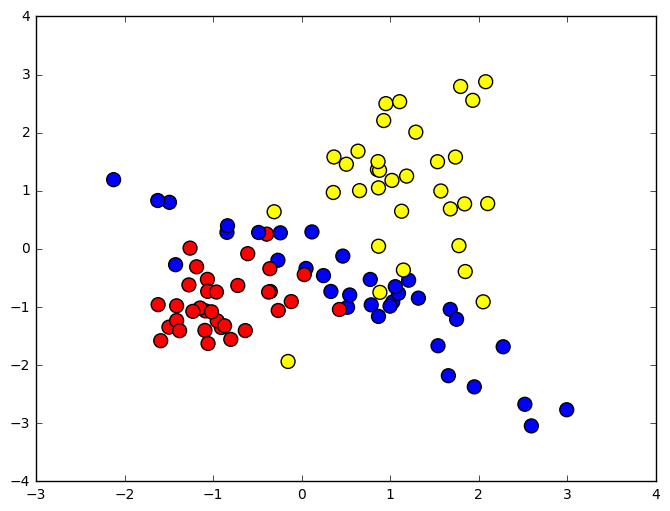

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [4]:
clf = neighbors.KNeighborsClassifier()

In [5]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

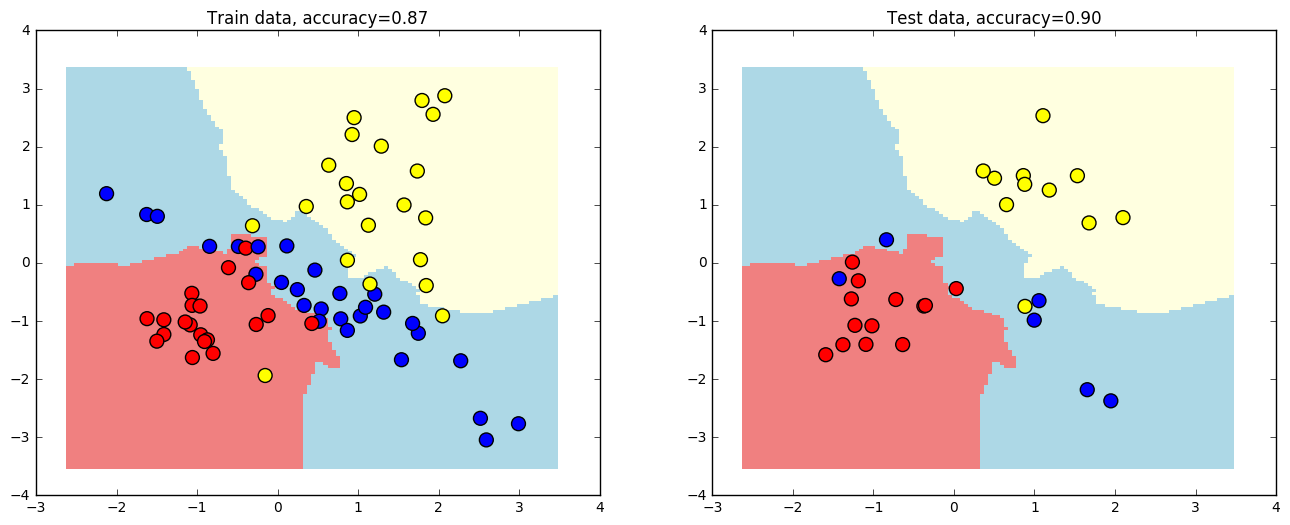

In [8]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

# Подбор параметра по cv

In [9]:
cv_acc = []
for i in range(1, 10):
    cv_acc.append(model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=i),
                                X = classification_problem[0], 
                                y = classification_problem[1]))

7


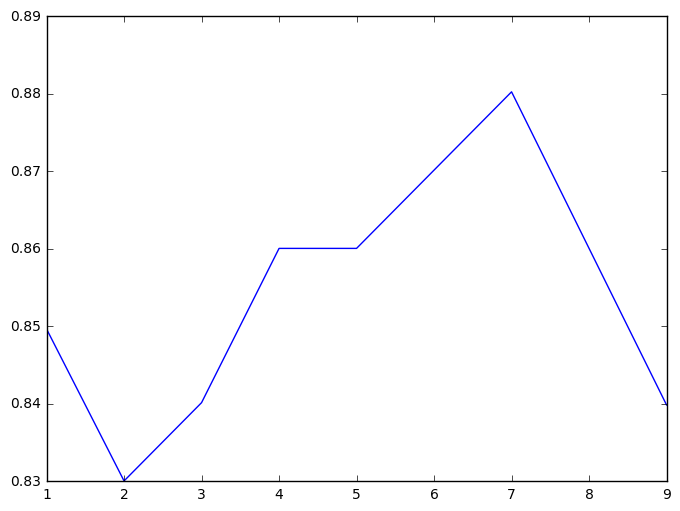

In [14]:
pylab.figure(figsize=(8, 6))
pylab.plot(range(1, 10), np.mean(cv_acc, axis=1))
print np.argmax( np.mean(cv_acc, axis=1)) + 1